<font size="+3"><strong>Location or Size: What Influences House Prices in Mexico?</strong></font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import VimeoVideo

You've wrangled the data, you've gained an understanding of its basic characteristics in your EDA, and now it's time to ask some research questions. 

# Import Data

**Task 1.4.1:** Read the CSV file that you created in the last notebook (`"../small-data/mexico-real-estate-clean.csv"`) into a DataFrame named `df`. Be sure to check that all your columns are the correct data type before you go to the next task.

- [What's a DataFrame?](../%40textbook/03-pandas-getting-started.ipynb#Working-with-DataFrames)
- [What's a CSV file?](../%40textbook/03-pandas-getting-started.ipynb#CSV-Files)
- [Read a CSV file into a DataFrame using pandas.](../%40textbook/03-pandas-getting-started.ipynb#Working-with-DataFrames)

In [2]:
df = pd.read_csv("data/mexico-real-estate-clean.csv")

# Research Question 1

**Which state has the most expensive real estate market?**

Do housing prices vary by state? If so, which are the most expensive states for purchasing a home? During our exploratory data analysis, we used descriptive statistics like mean and median to get an idea of the "typical" house price in Mexico. Now, we need to break that calculation down by state and visualize the results. 

We know in which state each house is located thanks to the `"state"` column. The next step is to divide our dataset into groups (one per state) and calculate the mean house price for each group. 

In [4]:
VimeoVideo("656378731", h="8daa35d1e8", width=600)

**Task 1.4.2:** Use the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method to create a Series named `mean_price_by_state`, where the index contains each state in the dataset and the values correspond to the mean house price for that state. Make sure your Series is sorted from highest to lowest mean price. 

- [What's a Series?](../%40textbook/05-pandas-summary-statistics.ipynb#Series)
- [Aggregate data using the `groupby` method in pandas.](../%40textbook/04-pandas-advanced.ipynb#Series-and-Groupby)

In [6]:
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)
mean_price_by_state

state
Querétaro                          133955.913281
Guanajuato                         133277.965833
Nuevo León                         129221.985663
Distrito Federal                   128347.267426
Quintana Roo                       128065.416053
Chihuahua                          127073.852000
Jalisco                            123386.472167
Estado de México                   122723.490503
Campeche                           121734.633333
Puebla                             121732.974000
Guerrero                           119854.276122
Sonora                             114547.883333
Morelos                            112697.295625
Aguascalientes                     110543.888000
Baja California Sur                109069.339333
Yucatán                            108580.388596
Chiapas                            104342.313273
Veracruz de Ignacio de la Llave     96928.125128
Hidalgo                             94012.326471
Sinaloa                             93922.152308
Tamaulipas    

In [7]:
VimeoVideo("656378435", h="b3765f3339", width=600)

**Task 1.4.3:** Use `mean_price_by_state` to create a bar chart of your results. Make sure the states are sorted from the highest to lowest mean, that you label the x-axis as `"State"` and the y-axis as `"Mean Price [USD]"`, and give the chart the title `"Mean House Price by State"`.

- [Create a bar chart using pandas.](../%40textbook/06-visualization-matplotlib.ipynb#Bar-Charts) 

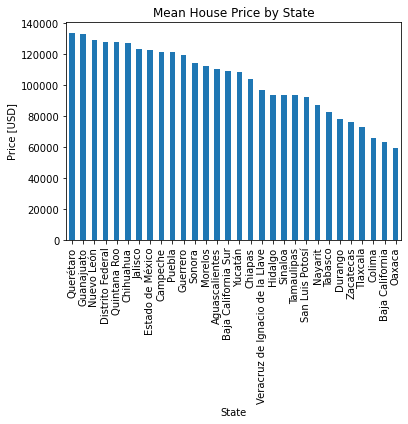

In [8]:
mean_price_by_state.plot(
    kind="bar", 
    xlabel="State",
    ylabel="Price [USD]",
    title="Mean House Price by State"
);

It seems odd that Querétaro would be the most expensive real estate market in Mexico when, [according to recent GDP numbers](https://en.wikipedia.org/wiki/List_of_Mexican_states_by_GDP), it's not in the top 10 state economies. With all the variations in house sizes across states, a better metric to look at would be price per m<sup>2</sup>. In order to do that, we need to create a new column.

In [9]:
VimeoVideo("656378342", h="2f4da7f7b4", width=600)

**Task 1.4.4:** Create a new column in `df` called `"price_per_m2"`. This should be the price for each house divided by it's size. 

- [Create new columns derived from existing columns in a DataFrame using pandas.](../%40textbook/03-pandas-getting-started.ipynb#Working-with-Columns)

In [10]:
df["price_per_m2"] = df["price_usd"]/df["area_m2"]

Let's redo our bar chart from above, but this time with the mean of `"price_per_m2"` for each state.

In [11]:
VimeoVideo("656377991", h="c7319b0458", width=600)

**Task 1.4.5:** First, use the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method to create a Series where the index contains each state in the dataset and the values correspond to the mean house price per m<sup>2</sup> for that state. Then use the Series to create a bar chart of your results. Make sure the states are sorted from the highest to lowest mean, that you label the x-axis as `"State"` and the y-axis as `"Mean Price per M^2[USD]"`, and give the chart the title `"Mean House Price per M^2 by State"`. 

- [What's a Series?](../%40textbook/05-pandas-summary-statistics.ipynb#Series)
- [Aggregate data using the `groupby` method in pandas.](../%40textbook/04-pandas-advanced.ipynb#Series-and-Groupby)
- [Create a bar chart using pandas.](../%40textbook/06-visualization-matplotlib.ipynb#Bar-Charts) 

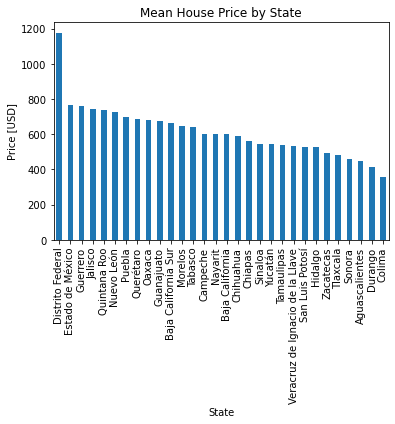

In [12]:
(
    df
    .groupby("state")
    ["price_per_m2"].mean()
    .sort_values(ascending=False)
    .plot(
        kind="bar",
        xlabel="State",
        ylabel="Price [USD]",
        title="Mean House Price by State"
    )
);

Now we see that the capital Mexico City (*Distrito Federal*) is by far the most expensive market.  Additionally, many of the top 10 states by GDP are also in the top 10 most expensive real estate markets. So it looks like this bar chart is a more accurate reflection of state real estate markets.

# Research Question 2

**Is there a relationship between home size and price?**

From our previous question, we know that the location of a home affects its price (especially if it's in Mexico City), but what about home size? Does the size of a house influence price?

A scatter plot can be helpful when evaluating the relationship between two columns because it lets you see if two variables are correlated — in this case, if an increase in home size is associated with an increase in price.

In [13]:
VimeoVideo("656377758", h="62546c7b86", width=600)

**Task 1.4.6:** Create a scatter plot from `df` that represents price as a function of size. In other words, `"area_m2"` should be on the x-axis, and `"price_usd"` should be on the y-axis. Be sure to use expressive axis labels (`"Area [sq meters]"` and `"Price [USD]"`, respectively).

- [What's a scatter plot?](../%40textbook/06-visualization-matplotlib.ipynb#Scatter-Plots)
- [What's correlation?](../%40textbook/05-pandas-summary-statistics.ipynb#Correlations)
- [Create a scatter plot using Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Scatter-Plots)

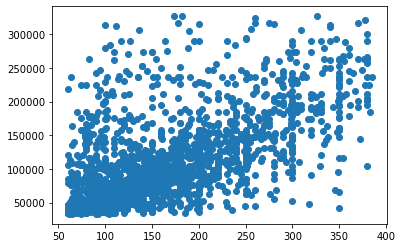

In [14]:
plt.scatter(x=df["area_m2"], y=df["price_usd"])
plt.xlabel="Area [sq meters]",
plt.ylabel="Price [USD]",
plt.title="Price vs Area"

While there's a good amount of variation, there's definitely a positive correlation — in other words, the bigger the house, the higher the price. But how can we quantify this correlation? 

In [15]:
VimeoVideo("656377616", h="8d3b060e71", width=600)

**Task 1.4.7:** Using the [`corr`](https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html) method, calculate the Pearson correlation coefficient for `"area_m2"` and `"price_usd"`. 

- [What's a correlation coefficient?](../%40textbook/05-pandas-summary-statistics.ipynb#Correlations)
- [Calculate the correlation coefficient for two Series using pandas.](../%40textbook/05-pandas-summary-statistics.ipynb#Correlations)

In [16]:
p_correlation = df["area_m2"].corr(df["price_usd"])
print(p_correlation)

0.5855182453232062


The correlation coefficient is over 0.5, so there's a moderate relationship house size and price in Mexico. But does this relationship hold true in every state? Let's look at a couple of states, starting with Morelos.

In [17]:
VimeoVideo("656377515", h="d2478d38df", width=600)

**Task 1.4.8:** Create a new DataFrame named `df_morelos`. It should include all the houses from `df` that are in the state of Morelos.

- [Subset a DataFrame with a mask using pandas.](../%40textbook/04-pandas-advanced.ipynb#Subsetting-with-Masks)

In [19]:
df_morelos = df[df["state"] == "Morelos"]
df_morelos

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
6,house,Morelos,18.812605,-98.954826,281.0,151509.56,539.179929
9,house,Morelos,18.804197,-98.932816,117.0,63223.78,540.374188
18,house,Morelos,18.855343,-99.241142,73.0,36775.16,503.769315
49,house,Morelos,18.804197,-98.932816,130.0,65858.10,506.600769
55,house,Morelos,18.960244,-99.212962,305.0,227351.46,745.414623
...,...,...,...,...,...,...,...
1708,house,Morelos,18.835637,-99.252857,200.0,63223.78,316.118900
1713,apartment,Morelos,18.963312,-99.214456,76.0,43729.78,575.391842
1725,house,Morelos,23.634501,-102.552788,180.0,63223.78,351.243222
1729,house,Morelos,18.842861,-99.225906,120.0,105372.96,878.108000


In [20]:
VimeoVideo("656377395", h="bd93b05ff9", width=600)

**Task 1.4.9:** Using `df_morelos`, create a scatter plot that shows price vs area. Make sure to use the same axis labels as your last scatter plot. The title should be `"Morelos: Price vs. Area"`.

- [What's a scatter plot?](../%40textbook/06-visualization-matplotlib.ipynb#Scatter-Plots)
- [Create a scatter plot using Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Scatter-Plots)

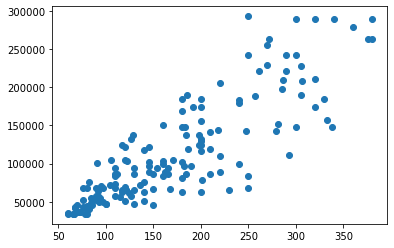

In [21]:
plt.scatter(x=df_morelos["area_m2"], y=df_morelos["price_usd"])
plt.xlabel="Area [sq meters]",
plt.ylabel="Price [USD]",
plt.title="Morelos: Price vs Area"

Wow! It looks like the correlation is even stronger within Morelos. Let's calculate the correlation coefficient and verify that that's the case.

In [22]:
VimeoVideo("656377340", h="664cb44291", width=600)

**Task 1.4.10:** Using the [`corr`](https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html) method, calculate the Pearson correlation coefficient for `"area_m2"` and `"price_usd"` in `df_morelos`. 

- [What's a correlation coefficient?](../%40textbook/05-pandas-summary-statistics.ipynb#Correlations)
- [Calculate the correlation coefficient for two Series using pandas.](../%40textbook/05-pandas-summary-statistics.ipynb#Correlations)

In [23]:
p_correlation = df_morelos["area_m2"].corr(df_morelos["price_usd"])
print(p_correlation)

0.8498077608713708


With a correlation coefficient that high, we can say that there's a strong relationship between house size and price in Morelos. 

To conclude, let's look at the capital Mexico City (*Distrito Federal*).  

In [24]:
VimeoVideo("656376911", h="19666a4c87", width=600)

**Task 1.4.11:** First, create a new DataFrame called `df_mexico_city` that includes all the observations from `df` that are part of the *Distrito Federal*. Next, create a scatter plot that shows price vs area. Don't forget to label the x- and y-axis and use the title `"Mexico City: Price vs. Area"`. Finally, calculate the  correlation coefficient for `"area_m2"` and `"price_usd"` in `df_mexico_city`.

- [Calculate the correlation coefficient for two Series using pandas.](../%40textbook/05-pandas-summary-statistics.ipynb#Correlations)
- [Create a scatter plot using Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Scatter-Plots)
- [Subset a DataFrame with a mask using pandas.](../%40textbook/04-pandas-advanced.ipynb#Subsetting-with-Masks)

0.41070392130717887


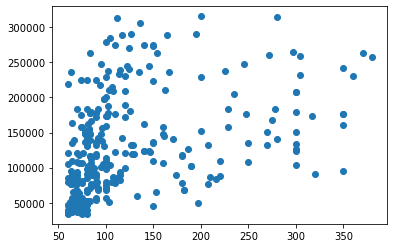

In [25]:
# Subset `df` to include only observations from `"Distrito Federal"`
df_mexico_city = df[df["state"] == "Distrito Federal"]

# Create a scatter plot price vs area
plt.scatter(x=df_mexico_city["area_m2"], y=df_mexico_city["price_usd"])
plt.xlabel="Area [sq meters]",
plt.ylabel="Price [USD]",
plt.title="Mexico citys: Price vs Area"

p_correlation = df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])
print(p_correlation)

Looking at the scatter plot and correlation coefficient, there's see a weak relationship between size and price. How should we interpret this? 

One interpretation is that the relationship we see between size and price in many states doesn't hold true in the country's biggest and most economically powerful urban center because there are other factors that have a larger influence on price. In fact, in the next project, we're going to look at another important Latin American city — Buenos Aires, Argentina — and build a model that predicts housing price by taking much more than size into account. 

---
Copyright © 2022 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
